In [1]:
import os
import imageio
import numpy as np
import keras
import pandas as pd
from sklearn.model_selection import  train_test_split
from skimage.feature import hog
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [2]:
training_directory = './MyData/'
len(os.listdir(training_directory))

43

In [3]:
num_classes = len(os.listdir(training_directory))

In [4]:
filecounts = []

for i in range(num_classes):
    count = 0
    training_directory = './MyData/' + str(i) + '/'
    for filename in os.listdir(training_directory):
        if (filename.endswith('.png')):
            count += 1
    filecounts.append([i, count])

In [5]:
sorted_data = sorted(filecounts, key=lambda x: x[1], reverse=True)
sorted_data

[[2, 2010],
 [1, 1980],
 [13, 1920],
 [12, 1890],
 [38, 1860],
 [10, 1800],
 [4, 1770],
 [5, 1650],
 [25, 1350],
 [9, 1320],
 [7, 1290],
 [3, 1260],
 [8, 1260],
 [11, 1170],
 [18, 1080],
 [35, 1080],
 [17, 990],
 [14, 690],
 [31, 690],
 [33, 599],
 [15, 540],
 [26, 540],
 [28, 480],
 [23, 450],
 [30, 390],
 [6, 360],
 [16, 360],
 [34, 360],
 [22, 330],
 [36, 330],
 [20, 300],
 [40, 300],
 [21, 270],
 [39, 270],
 [24, 240],
 [29, 240],
 [27, 210],
 [32, 210],
 [41, 210],
 [42, 210],
 [0, 180],
 [19, 180],
 [37, 180]]

In [6]:
#Getting the average file count
total = sum(n for [_, n] in filecounts)
total/num_classes

809.2790697674419

In [7]:
# 800 seems like a good mid-point, giving us 34400 files total down from 34799
print("current image count: " + str(total))
print("desired image count: " + str(800*num_classes))

current image count: 34799
desired image count: 34400


<BarContainer object of 43 artists>

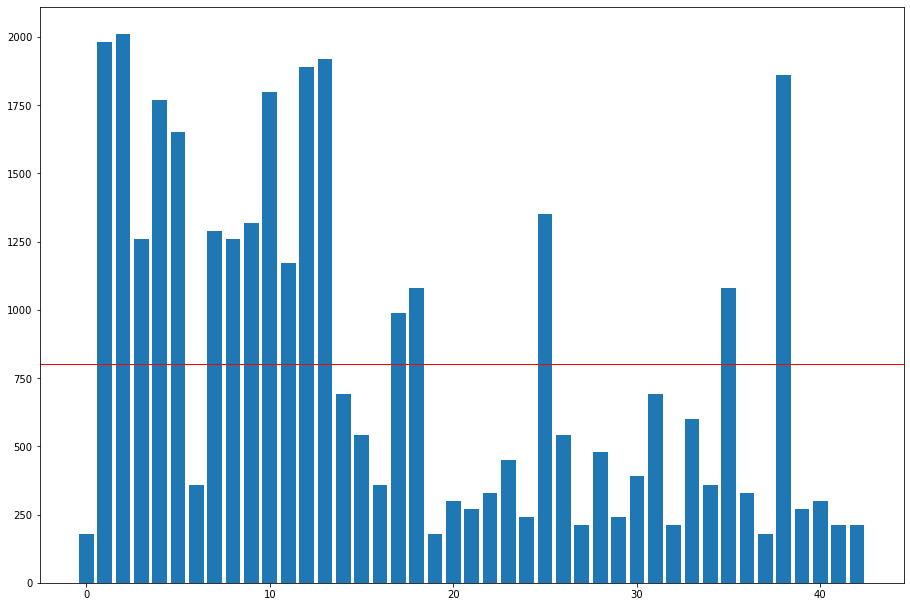

In [8]:
#Plotting the data counts
x = [n for [n, _] in filecounts]
heights = [n for [_, n] in filecounts]

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
plt.axhline(y=800,linewidth=1, color='r')
ax.bar(x,heights)

## Undersampling

In [9]:
# The set of data which exceeds 800
undersample_set = [n for n in filecounts if n[1]>800]
# undersample_set = [[n,c-800] for [n,c] in undersample_set]
undersample_set

[[1, 1980],
 [2, 2010],
 [3, 1260],
 [4, 1770],
 [5, 1650],
 [7, 1290],
 [8, 1260],
 [9, 1320],
 [10, 1800],
 [11, 1170],
 [12, 1890],
 [13, 1920],
 [17, 990],
 [18, 1080],
 [25, 1350],
 [35, 1080],
 [38, 1860]]

In [10]:
import random
random.sample(range(800), 800)

[362,
 366,
 453,
 196,
 221,
 233,
 279,
 544,
 239,
 646,
 712,
 430,
 756,
 268,
 1,
 634,
 178,
 484,
 635,
 194,
 137,
 424,
 235,
 427,
 164,
 460,
 659,
 443,
 702,
 266,
 546,
 741,
 97,
 199,
 787,
 247,
 398,
 675,
 271,
 685,
 333,
 262,
 78,
 428,
 0,
 571,
 394,
 107,
 48,
 629,
 632,
 216,
 339,
 739,
 193,
 292,
 173,
 538,
 258,
 211,
 89,
 283,
 482,
 560,
 240,
 673,
 84,
 261,
 372,
 109,
 254,
 125,
 697,
 16,
 298,
 647,
 782,
 748,
 242,
 367,
 410,
 191,
 506,
 764,
 82,
 746,
 316,
 654,
 53,
 108,
 529,
 281,
 51,
 148,
 346,
 448,
 225,
 418,
 356,
 765,
 761,
 735,
 790,
 767,
 643,
 597,
 83,
 288,
 605,
 73,
 532,
 698,
 672,
 120,
 671,
 505,
 289,
 344,
 454,
 24,
 584,
 763,
 251,
 789,
 583,
 104,
 302,
 55,
 722,
 69,
 523,
 375,
 396,
 599,
 774,
 44,
 3,
 519,
 321,
 387,
 145,
 175,
 33,
 473,
 775,
 445,
 13,
 612,
 792,
 278,
 162,
 525,
 263,
 113,
 511,
 541,
 650,
 485,
 300,
 360,
 426,
 509,
 405,
 495,
 700,
 456,
 147,
 49,
 5,
 90,
 282,
 

In [11]:
filecounts2 = []

for i in range(num_classes):
    training_directory = './MyData/' + str(i) + '/'
    count = 0
    
    img_count = len(os.listdir(training_directory))
    
    if img_count>800:
        rand = random.sample(range(img_count), 800)
        for (idx, filename) in enumerate(os.listdir(training_directory)):
            if idx in rand:
                count += 1
#                 image = imageio.imread(training_directory + filename)
    else:
        for filename in os.listdir(training_directory):
            if (filename.endswith('.png')):
                count += 1
#                 image = imageio.imread(training_directory + filename)
    filecounts2.append([i, count])
filecounts2

[[0, 180],
 [1, 800],
 [2, 800],
 [3, 800],
 [4, 800],
 [5, 800],
 [6, 360],
 [7, 800],
 [8, 800],
 [9, 800],
 [10, 800],
 [11, 800],
 [12, 800],
 [13, 800],
 [14, 690],
 [15, 540],
 [16, 360],
 [17, 800],
 [18, 800],
 [19, 180],
 [20, 300],
 [21, 270],
 [22, 330],
 [23, 450],
 [24, 240],
 [25, 800],
 [26, 540],
 [27, 210],
 [28, 480],
 [29, 240],
 [30, 390],
 [31, 690],
 [32, 210],
 [33, 599],
 [34, 360],
 [35, 800],
 [36, 330],
 [37, 180],
 [38, 800],
 [39, 270],
 [40, 300],
 [41, 210],
 [42, 210]]

<BarContainer object of 43 artists>

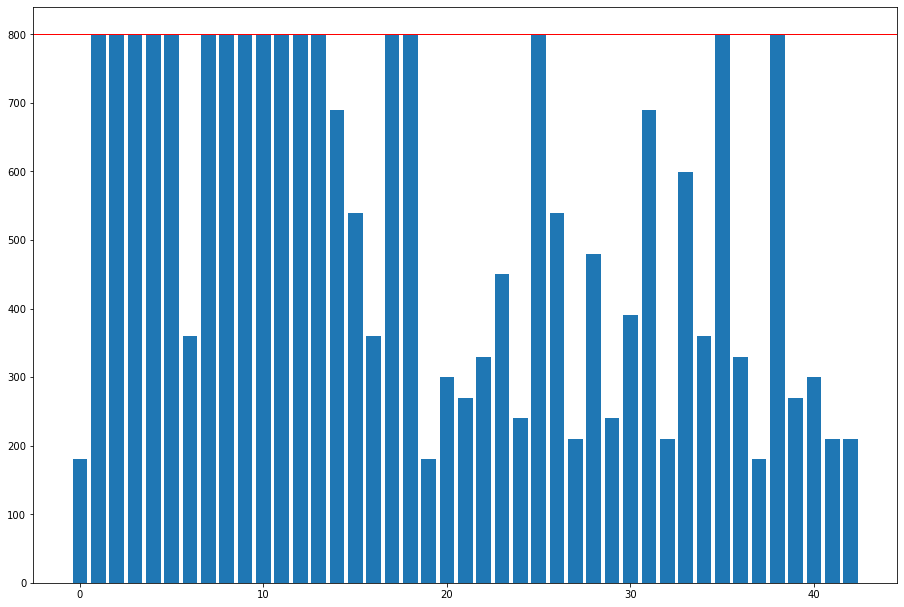

In [12]:
#Plotting the data counts
x = [n for [n, _] in filecounts2]
heights = [n for [_, n] in filecounts2]

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
plt.axhline(y=800,linewidth=1, color='r')
ax.bar(x,heights)

## Oversampling
This section requires actually loading the dataset

In [13]:
data = []
labels = []

max_file_count = 800

for i in range(num_classes):
    training_directory = './MyData/' + str(i) + '/'
    count = 0
    
    img_count = len(os.listdir(training_directory))
    
    if img_count > max_file_count:
        rand = random.sample(range(img_count), max_file_count)
        for (idx, filename) in enumerate(os.listdir(training_directory)):
            if idx in rand:
                image = imageio.imread(training_directory + filename)
                data.append(np.array(image))
                labels.append(i)
    else:
        for filename in os.listdir(training_directory):
            image = imageio.imread(training_directory + filename)
            data.append(np.array(image))
            labels.append(i)
    
    print(str(i), end=' ')
    
data = np.array(data)
labels = np.array(labels)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [14]:
print(data.shape)
print(labels.shape)

(22719, 32, 32, 3)
(22719,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [16]:
#might require installation of imblearn/delayed
#!pip install imblearn
#!pip install delayed

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=7)

In [17]:
nsamples, nx, ny, nz = x_train.shape
d2_dataset = x_train.reshape((nsamples,nx*ny*nz))

In [18]:
oversampled_trainX, oversampled_trainY = sm.fit_resample(d2_dataset, y_train)

In [19]:
print(oversampled_trainX.shape)
print(oversampled_trainY.shape)

(16359, 3072)
(16359,)


In [20]:
oversampled_trainY

array([ 7, 14, 35, ..., 19, 19, 19])

In [21]:
np.histogram(oversampled_trainY, bins = 42)

(array([125, 553, 560, 576, 540, 548, 245, 570, 544, 550, 560, 557, 562,
        565, 472, 393, 249, 543, 550, 576, 202, 181, 240, 310, 177, 553,
        382, 143, 334, 176, 289, 498, 155, 431, 270, 558, 225, 126, 562,
        195, 209, 305], dtype=int64),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42.]))